In [155]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/adult 3.csv")

# Display the first 5 rows
display(data.head())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [145]:
# Check for missing values
display(data.isnull().sum())

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [146]:
print(data['workclass'].value_counts())
data['workclass'] = data['workclass'].replace('?', 'Others')
print(data['workclass'].value_counts())

print(data['occupation'].value_counts())
data['occupation'] = data['occupation'].replace('?', 'Others')
print(data['occupation'].value_counts())

print(data['native-country'].value_counts())
data['native-country'] = data['native-country'].replace('?', 'Others')
print(data['native-country'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
occupation
Prof-specialty       6

In [147]:
# 1. Remove rows where 'workclass' is 'Without-pay' or 'Never-worked'.
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]

# 2. Remove outliers from the 'age' column by keeping values between 17 and 75 (inclusive).
data = data[(data['age'] >= 17) & (data['age'] <= 75)]

# 3. Remove outliers from the 'educational-num' column by keeping values between 5 and 16 (inclusive).
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]

# 4. Drop the 'education' column as it is redundant with 'educational-num'.
data = data.drop(columns=['education'])

# 5. Apply Label Encoding to the categorical columns.
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

display(data.head())
display(data.shape)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K


(46720, 14)

In [148]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['income'])
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
37535,53,3,324568,7,2,2,0,4,1,0,0,45,39
22061,41,3,342164,10,0,12,1,4,0,0,0,15,39
22055,58,1,92141,12,6,0,1,2,0,0,0,40,39
39792,47,4,215620,14,2,3,0,4,1,15024,0,55,39
7296,62,3,185503,14,2,3,0,4,1,0,0,50,39


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
3585,46,6,104908,9,4,7,4,2,0,0,0,40,39
19036,24,3,211345,10,4,7,3,4,0,0,0,40,25
34236,27,5,66473,13,2,3,0,4,1,0,0,50,39
30081,40,3,162098,9,0,0,4,4,0,0,0,30,39
7514,63,3,697806,9,2,14,0,4,1,0,0,60,39


,income
37535,<=50K
22061,<=50K
22055,<=50K
39792,>50K
7296,>50K


,income
3585,<=50K
19036,<=50K
34236,<=50K
30081,<=50K
7514,<=50K


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7981
RandomForest Accuracy: 0.8505
KNN Accuracy: 0.7708
SVM Accuracy: 0.7884
GradientBoosting Accuracy: 0.8557



Classification Report for LogisticRegression:
              precision    recall  f1-score   support

       <=50K       0.82      0.94      0.87      7010
        >50K       0.67      0.37      0.48      2334

    accuracy                           0.80      9344
   macro avg       0.75      0.66      0.68      9344
weighted avg       0.78      0.80      0.78      9344


Classification Report for RandomForest:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.85      9344


Classification Report for KNN:
              precision    recall  f1-score   support

       <=50K       0.80      0.92      0.86      7010
        >50K       0.57      0.33      0.42      2334

    accuracy                           0.77      9344
   macro

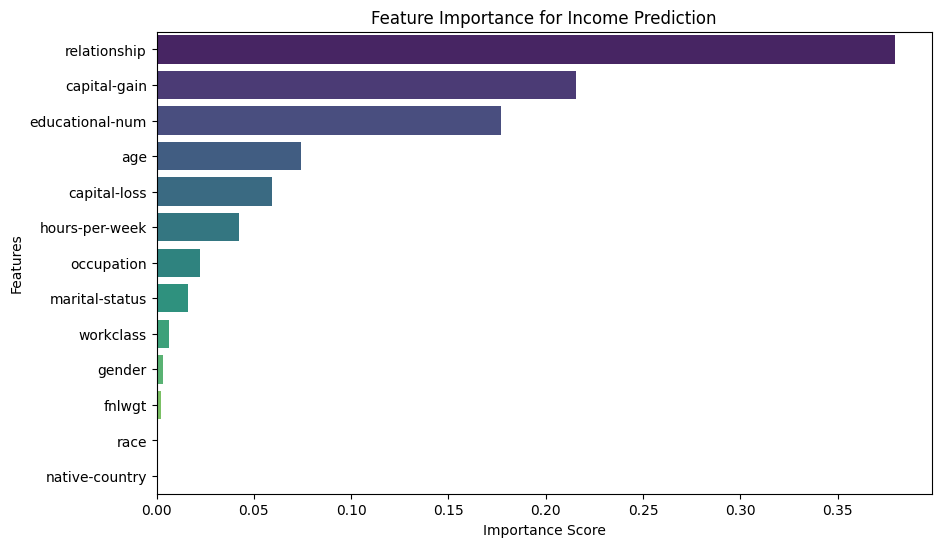

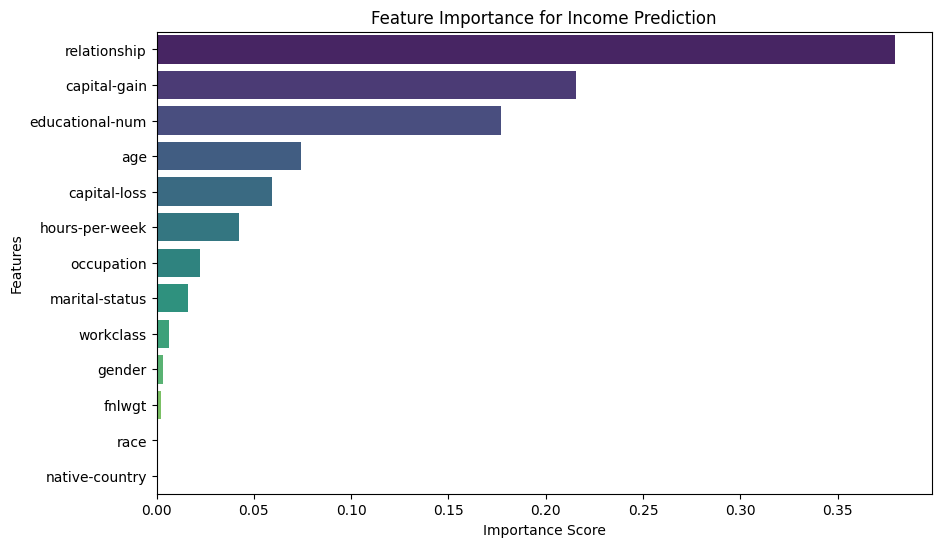

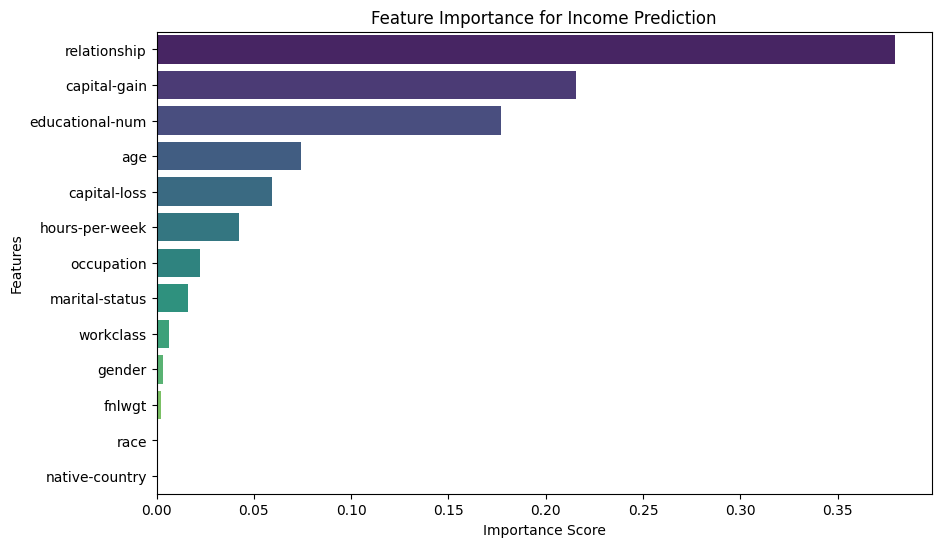

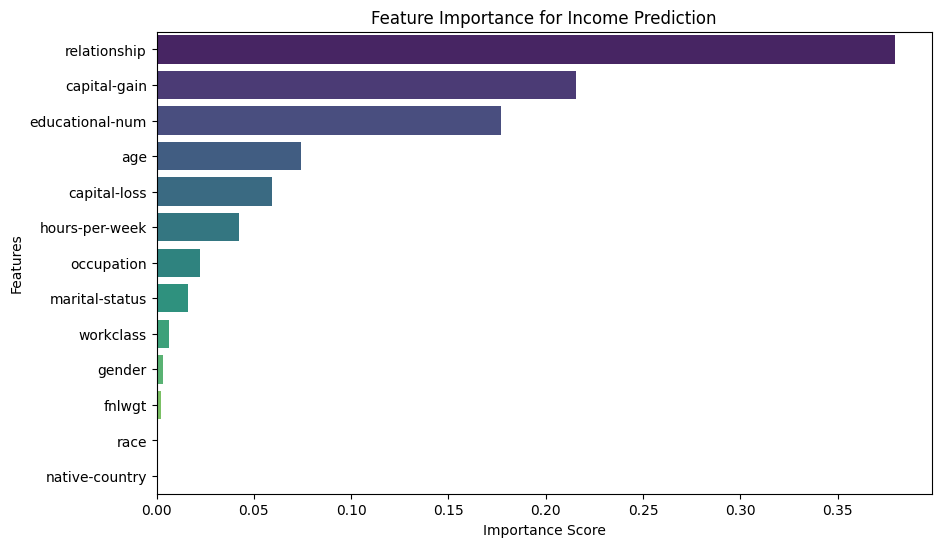

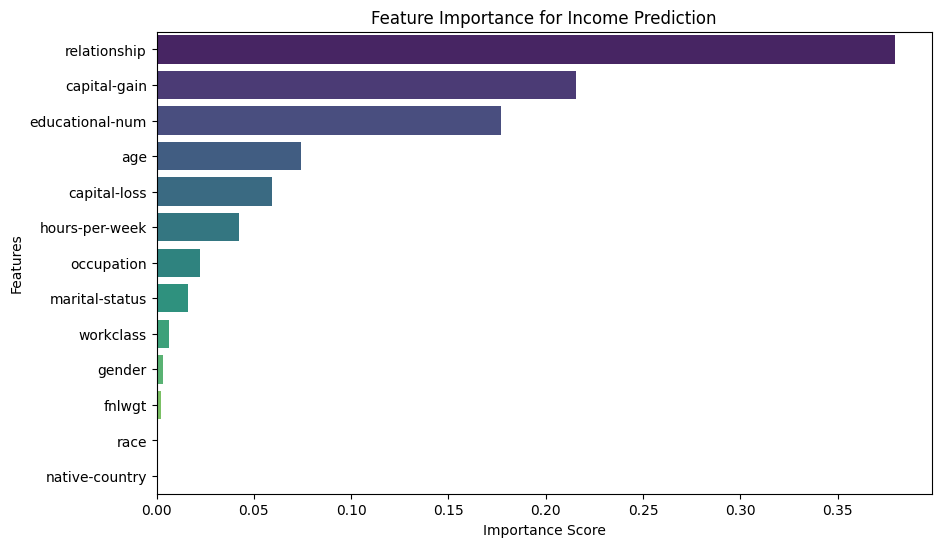

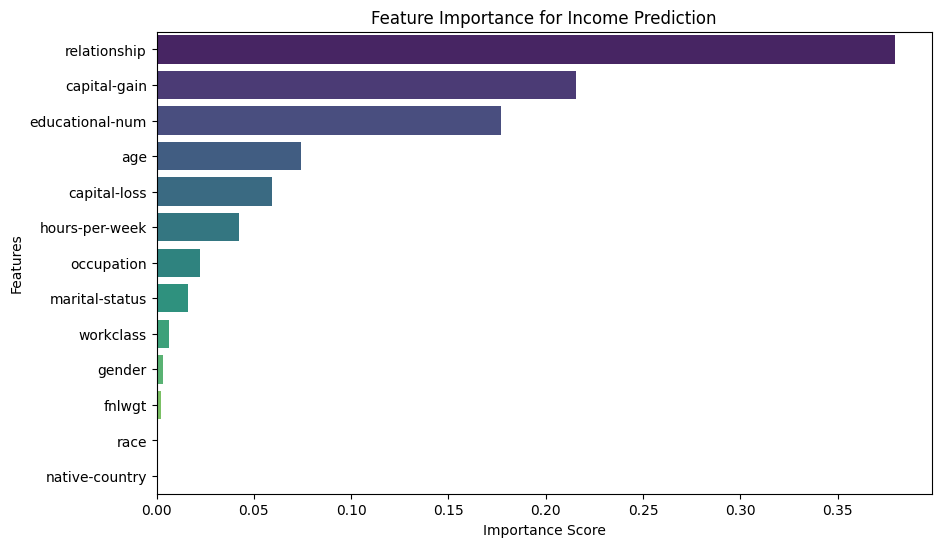

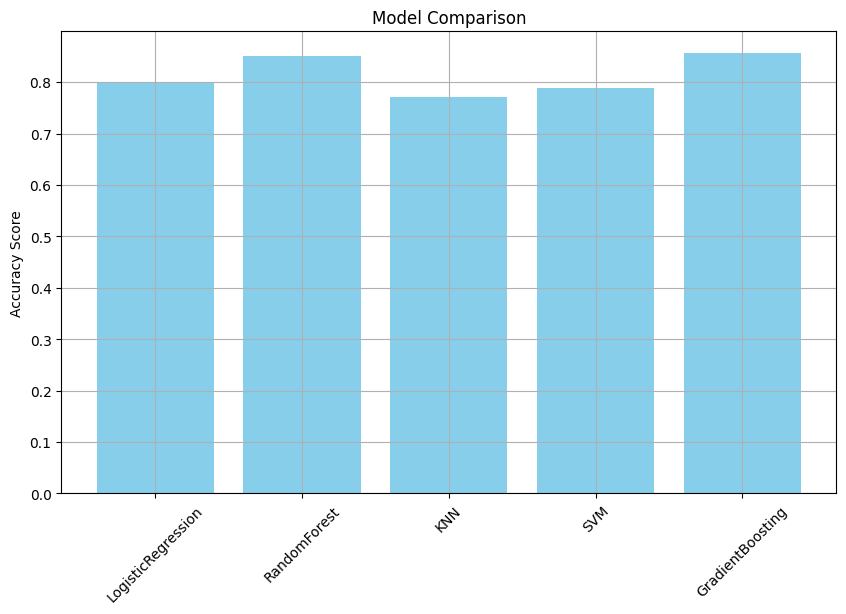

In [150]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [151]:
import joblib

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

joblib.dump(best_model, "best_model.pkl")
print(f"✅ Saved best model ({best_model_name}) as best_model.pkl")

✅ Saved best model (GradientBoosting) as best_model.pkl


In [152]:
%%writefile requirements.txt
pandas
scikit-learn
joblib
streamlit
matplotlib
seaborn

Overwriting requirements.txt


In [156]:

import streamlit as st
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder here

# Set page config for better styling
st.set_page_config(page_title="Income Prediction App", layout="wide", initial_sidebar_state="expanded")

# Add custom CSS for styling
st.markdown("""
<style>
body {
    background-color: #f0f2f6; /* Light grey background */
    font-family: 'Arial', sans-serif;
}
.stApp {
    background-color: #f0f2f6; /* Light grey background for the main app area */
}
.st-emotion-cache-1avcm0k { /* Target the main content area */
    padding: 2rem;
    background-color: #ffffff; /* White background for content */
    border-radius: 10px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}
h1, h2, h3 {
    color: #1E90FF; /* Dodger Blue for headers */
}
.stButton>button {
    background-color: #1E90FF;
    color: white;
    font-weight: bold;
    padding: 0.5rem 1rem;
    border-radius: 5px;
    border: none;
    transition: all 0.3s ease;
}
.stButton>button:hover {
    background-color: #4682B4; /* Steel Blue on hover */
    color: white;
}
.stTextInput>div>div>input, .stSelectbox>div>div>select, .stSlider>div>div>div>div {
    border-radius: 5px;
}
.stSuccess {
    background-color: #d4edda;
    color: #155724;
    border-color: #c3e6cb;
    padding: 1rem;
    border-radius: 5px;
    margin-bottom: 1rem;
}
.stWarning {
    background-color: #fff3cd;
    color: #856404;
    border-color: #ffeeba;
    padding: 1rem;
    border-radius: 5px;
    margin-bottom: 1rem;
}
/* Add some additional styling for better spacing and appearance */
.stVerticalBlock {
    gap: 1rem; /* Add space between vertical blocks */
}
.stHorizontalBlock {
    gap: 1rem; /* Add space between horizontal blocks */
}
</style>
""", unsafe_allow_html=True)


# Define categories explicitly based on the training data
workclass_categories = ['Private', 'Self-emp-not-inc', 'Local-gov', 'Others', 'State-gov', 'Self-emp-inc', 'Federal-gov']
marital_status_categories = ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation_categories = ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Others', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
relationship_categories = ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']
race_categories = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
gender_categories = ['Male', 'Female']
native_country_categories = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands', 'Thailand', 'Guatemala', 'Nicaragua', 'Scotland', 'Columbia', 'Laos', 'Taiwan', 'Haiti', 'Hungary', 'atemala-Total', 'Cuba-Total', 'England-Total', 'Germany-Total', 'Greece-Total', 'India-Total', 'Iran-Total', 'Ireland-Total', 'Italy-Total', 'Jamaica-Total', 'Japan-Total', 'Laos-Total', 'Mexico-Total', 'Nicaragua-Total', 'Peru-Total', 'Philippines-Total', 'Poland-Total', 'Puerto-Rico-Total', 'Scotland-Total', 'South-Total', 'Taiwan-Total', 'Thailand-Total', 'Trinadad&Tobago-Total', 'United-States-Total', 'Vietnam-Total', 'Yugoslavia', '?']


# Get the current directory (for reference, not displayed)
current_dir = os.getcwd()
# Removed debugging print statements
# st.write(f"Current working directory: {current_dir}")
# st.write(f"Files in current directory: {os.listdir(current_dir)}")

# Model file path - assuming best_model.pkl is in the same directory as app.py
model_path = os.path.join(current_dir, "best_model.pkl")

# Load the best model
try:
    model = joblib.load(model_path)
    st.success("Model loaded successfully!")
except FileNotFoundError:
    st.error(f"Error: Model file not found at {model_path}. Please ensure 'best_model.pkl' exists in the same directory as app.py.")
    st.stop() # Stop the app if the model file is not found
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop()


st.markdown("<h1 style='text-align: center; color: #1E90FF;'>Income Prediction App</h1>", unsafe_allow_html=True)
st.markdown("<style>h1{font-size: 3em;} h2{font-size: 2em;}</style>", unsafe_allow_html=True) # Custom CSS for headers


st.markdown("---") # Add a horizontal rule

st.write("Enter the following information to predict income:")

# Use columns for better layout
col1, col2 = st.columns(2)

with col1:
    st.markdown("<h2 style='text-align: center; color: #1E90FF;'>Personal Information</h2>", unsafe_allow_html=True) # Styled header
    age = st.slider("Age", min_value=17, max_value=90, value=30) # Changed to slider for better user experience
    gender = st.selectbox("Gender", ['Male', 'Female'])
    race = st.selectbox("Race", ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
    native_country = st.selectbox("Native Country", ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands', 'Thailand', 'Guatemala', 'Nicaragua', 'Scotland', 'Columbia', 'Laos', 'Taiwan', 'Haiti', 'Hungary', 'atemala-Total', 'Cuba-Total', 'England-Total', 'Germany-Total', 'Greece-Total', 'India-Total', 'Iran-Total', 'Ireland-Total', 'Italy-Total', 'Jamaica-Total', 'Japan-Total', 'Laos-Total', 'Mexico-Total', 'Nicaragua-Total', 'Peru-Total', 'Philippines-Total', 'Poland-Total', 'Puerto-Rico-Total', 'Scotland-Total', 'South-Total', 'Taiwan-Total', 'Thailand-Total', 'Trinadad&Tobago-Total', 'United-States-Total', 'Vietnam-Total', 'Yugoslavia', '?'])

with col2:
    st.markdown("<h2 style='text-align: center; color: #1E90FF;'>Employment and Financial Information</h2>", unsafe_allow_html=True) # Styled header
    workclass = st.selectbox("Workclass", ['Private', 'Self-emp-not-inc', 'Local-gov', 'Others', 'State-gov', 'Self-emp-inc', 'Federal-gov'])
    fnlwgt = st.number_input("Fnlwgt", value=100000)
    educational_num = st.slider("Educational Num", min_value=1, max_value=16, value=10) # Changed to slider
    marital_status = st.selectbox("Marital Status", ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'])
    occupation = st.selectbox("Occupation", ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Others', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces'])
    relationship = st.selectbox("Relationship", ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'])
    capital_gain = st.number_input("Capital Gain", value=0)
    capital_loss = st.number_input("Capital Loss", value=0)
    hours_per_week = st.slider("Hours per Week", min_value=1, max_value=99, value=40) # Changed to slider


# Create a dictionary with the input values
input_data = {
    'age': age,
    'workclass': workclass,
    'fnlwgt': fnlwgt,
    'educational-num': educational_num,
    'marital-status': marital_status,
    'occupation': occupation,
    'relationship': relationship,
    'race': race,
    'gender': gender,
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'hours-per-week': hours_per_week,
    'native-country': native_country
}

# Convert input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Preprocess the input data (Label Encoding for categorical features)
# The order of columns and categories should match the training data
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

encoders = {}
for col, categories in zip(categorical_cols, [workclass_categories, marital_status_categories, occupation_categories, relationship_categories, race_categories, gender_categories, native_country_categories]):
    encoder = LabelEncoder()
    encoder.fit(categories)
    input_df[col] = encoder.transform(input_df[col])


# Make prediction
if st.button("Predict Income"):
    try:
        prediction = model.predict(input_df)
        st.subheader("Prediction:")
        if prediction[0] == '<=50K':
            st.success("The predicted income is <=50K") # Use st.success for positive outcome
        else:
            st.warning("The predicted income is >50K") # Use st.warning for potentially higher income
    except Exception as e:
        st.error(f"Error during prediction: {e}")

# Display Feature Importance (assuming the best model is GradientBoostingClassifier)
if hasattr(model, 'feature_importances_'):
    st.subheader("Feature Importance")
    feature_importances = pd.Series(model.feature_importances_, index=input_df.columns)
    # Sort feature importances for better visualization
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis') # Changed color palette
    plt.title("Feature Importance for Income Prediction")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    st.pyplot(plt)
else:
    st.info("Feature importance is not available for the selected model.")

2025-07-18 10:03:07.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 10:03:07.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 10:03:07.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 10:03:07.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 10:03:07.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 10:03:07.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 10:03:07.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 10:03:07.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.12.152:8501

